<a href="https://colab.research.google.com/github/Chaitanya081/DSA0410_Fundamentals-of-Data-Science-Lab-Experiments/blob/main/EXP_39_Build_a_clustering_model_using_the_K_Means_algorithm_to_group_customers_based_on_their_spending_and_purchase_behavior_and_visualize_the_clusters_using_scatter_plots_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("customer_purchase_data.csv")

print("Dataset Preview:")
print(df.head())

Dataset Preview:
   CustomerID  Total_Spent  Items_Purchased
0           1        12000               15
1           2         4500                5
2           3        18000               20
3           4         3000                3
4           5         9500               10


In [ ]:
X = df[['Total_Spent', 'Items_Purchased']]

# Feature scaling (IMPORTANT for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("\nClustered Data:")
print(df)



Clustered Data:
    CustomerID  Total_Spent  Items_Purchased  Cluster
0            1        12000               15        0
1            2         4500                5        1
2            3        18000               20        0
3            4         3000                3        1
4            5         9500               10        1
5            6        22000               25        2
6            7         4000                4        1
7            8        16000               18        0
8            9         7000                8        1
9           10        14000               14        0
10          11        26000               30        2
11          12         5200                6        1
12          13         8800                9        1
13          14        19500               22        2
14          15         3300                2        1
15          16        17500               19        0
16          17         6000                7        1
17         

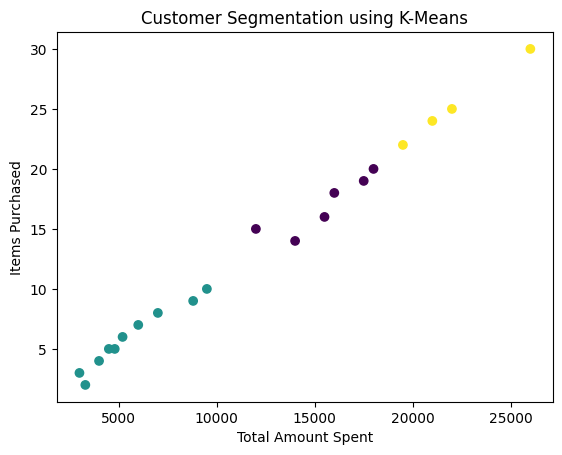

In [ ]:
# ---------------- VISUALIZATION ----------------
plt.figure()
plt.scatter(
    df['Total_Spent'],
    df['Items_Purchased'],
    c=df['Cluster']
)

plt.xlabel("Total Amount Spent")
plt.ylabel("Items Purchased")
plt.title("Customer Segmentation using K-Means")
plt.show()

In [ ]:
# -------- NEW CUSTOMER PREDICTION --------
print("\nEnter new customer details:")
spent = float(input("Total amount spent: "))
items = int(input("Number of items purchased: "))

new_customer = pd.DataFrame(
    [[spent, items]],
    columns=['Total_Spent', 'Items_Purchased']
)

new_customer_scaled = scaler.transform(new_customer)
cluster = kmeans.predict(new_customer_scaled)

print("\nThe new customer belongs to Segment:", cluster[0])



Enter new customer details:
Total amount spent: 15000
Number of items purchased: 15

The new customer belongs to Segment: 0
